# $\underline{\text{Analisis de series de tiempo}}$

En esta actividad se centrara en analizar las series de tiempo de los datos climatologicos de la estacion elegida.

In [ ]:
#Primero, vamos a importar las bibliotecas a utilizar:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#Esta siguiente biblioteca se utiliza para analizar la estaiconalidad, tendencia y residuo
import statsmodels.api as sm

%matplotlib inline


# $\underline{\text{Copiando el codigo inicial}}$

En esta celda se copiara el codigo inicial con el cual se limpiaron los datos del df original, esto para poder hacer una copia de trabajo para esta actividad.

In [ ]:
#Importando las bibliotecas a utilizar
import numpy as np
import pandas as pd


#==========CREANDO UN DF DEL ARCHIVO DE DATOS Y UN DF PROVICIONAL DE TRABAJO====================
# Creamos un DataFrame compra a partir del archivo de texto de los datos diarios de la estacion en nuestro repositorio:

url = "https://raw.githubusercontent.com/Refer-MF/Fisica-Computacional-2020-1-Gustavo-Medina/master/Actividad%201/Datos%20diarios.txt"
#La URL del archivo de datos que esta guardado en mi repositorio de GH
encabezados=['FECHA','PRECIP','EVAP','TMax','TMin'] #Encabezados de las columnas, de acuerdo al archivo que se leera


df_datclim = pd.read_csv(url, names=encabezados, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')
#El df read se declara con (url del archivo que usaras, names=como quieres que se titulen las columnas, encoding=formato del archivo que en este caso es 
#espanol, sep= la separacion de los datos en el archivo, header= (Encabezado?), skiprows=numero de renglones que quieres que se omitan del principio, skipfooter= numero de renglones que quieres que se omitan del final, engine= el motor que lo leera)


#print(df_datclim.head(10)) #Para imprimir los primeros tres renglones del df
#print(df_datclim.tail(10)) #Para imprimir los ultimos tres renglones del df
#df_datclim.shape #Para imprimir la forma del df (Renglones, columnas). Mi df tiene una forma de (24364,5) 
#df_datclim.info() #Para imprimir la informacion del df (Cuantas columnas, nombres de columnas, conteo de datos por columnas, tipo de dato)


df_datclim0=df_datclim.copy() #Creando un df con el cual trabajaremos, el otro lo mantendremos intacto
#df_datclim0.head()

str_Nulo='Nulo'
df_datclim1=df_datclim0.replace(to_replace=str_Nulo, value=' ', regex=True) #Este df no tendra ningun "Nulo" en sus casillas.
#df_datclim1.head()

#======================PASANDO LOS DATOS A NUMERICOS======================
cols_list=['PRECIP','EVAP','TMax','TMin'] #Un diccionario que usaremos para analizar el df en un loop for
for cols in cols_list:
  df_datclim1[cols]=pd.to_numeric(df_datclim1[cols], errors='coerce') #Pasando los datos en las columnas del diccionario a numerico y los que no apliquen
#seran mostrados como un 'NaN' (Eso significa 'errors='coerce'')

#df_datclim1.info() #A partir de esta informacion, vemos que a mi set de datos no le hace falta muchos. Pero para asegurarnos, contaremos los fatos faltantes.

print('\n ') #Solo para ayudar en la lectura

#=============CONTANDO LOS DATOS FALTANTES=====================
#df_datclim1.isnull().sum() #*Sumando los valores nulos. A partir de esta informacion vemos que la precipitacion no tiene ningun dato nulo, la evaporacion
#tiene la mayoria de datos nulos con 214, la temperatura maxima y la minima les faltan a los dos 5 datos. De los 70 y algo años que lleva activa la
#estacion, me parece que le falta muy pocos datos.

#df_datclim1.head()
#df_datclim1.tail()

#============ANALISIS ESTADISTICO===============
#df_datclim1.describe() #A partir de esto podemos observar que los datos no tienen ninguna incoherencia. Los datos de temperatura, en base a mi experiencia
#y mi vivencia en esta region, parecen normales, exceptuando la temperatura minima de -2 grados, ya que en la ciudad de Obregon nunca he experimentado 
#temperaturas bajo cero (sin embargo no es algo sorpresivo, ya que en epocas de invierno las temperaturas llegan hasta 6 grados centigrados).
#La precipitacion maxima es de 137.5 mm, lo cual es bastante, y se puede explicar con algun huracan o tormenta tropical.

#==============TRABAJANDO CON FECHAS===============
df_datclim2=df_datclim1.copy()
#df_datclim2['FECHA'].head() #Para imprimir solo las de la columna 'FECHA'

df_datclim2['FECHA']=pd.to_datetime(df_datclim2['FECHA'], dayfirst=True).copy() #Cambiando los datos de la columna FECHAS a fechas con el dia primero.
#df_datclim2['FECHA'].head()
df_datclim2.dtypes #Checando el tipo de dato de las columnas.

df_datclim2['Año']=df_datclim2['FECHA'].dt.year #Añadiendo una columna 'Año' al df con el año respectivo de la medida
df_datclim2['Mes']=df_datclim2['FECHA'].dt.month #Añadiendo una columna 'Mes' al df con el mes respectivo de la medida

#df_datclim2.head()
#df_datclim2.tail()

#df_datclim2.info() #Para checar que la informacion este correcta

#===============================================================================
#============FIN DE LA PRIMERA SEMANA===========================================
#===============================================================================

df_datclim3=df_datclim2.copy() #Df con el que trabajaremos en esta semana

# $\underline{\text{Actividad de esta semana}}$

# $\underline{\text{Parte 1:}}$

Ahora vamos a comenzar con la actividad de la semana en cuestion.

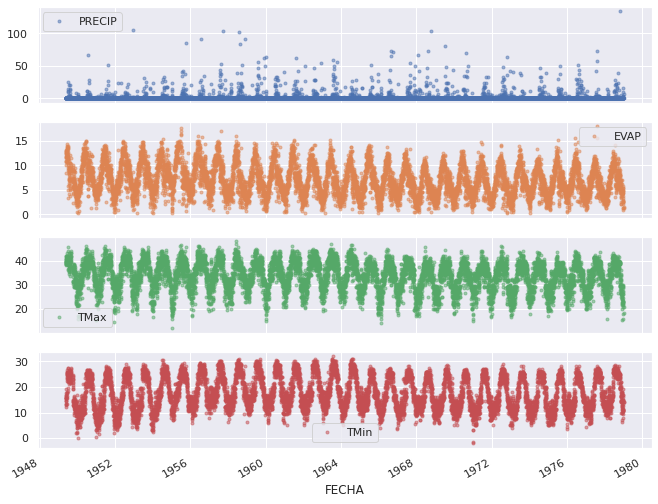

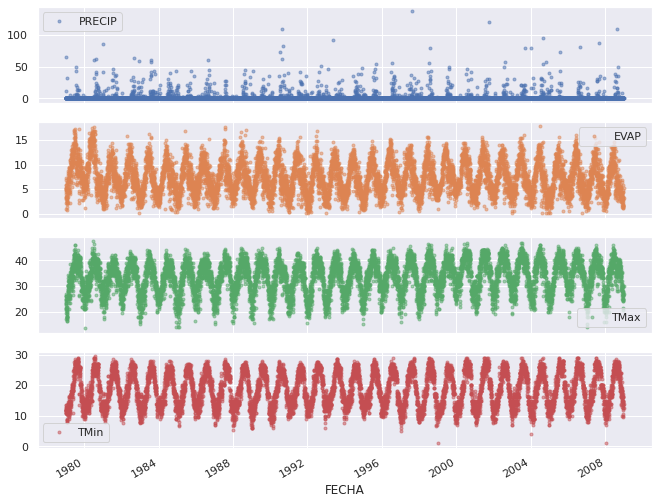

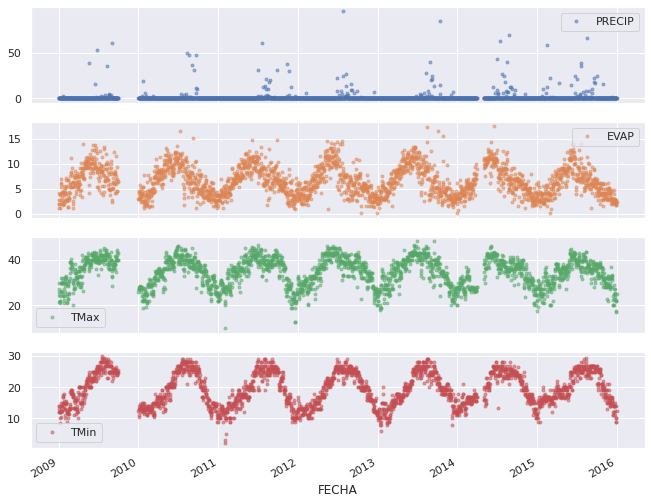

In [ ]:
#Creamos una copia de trabajo
df_datclim_ts=df_datclim3.copy()
#Redefinimos el indice como "Fecha"
df_datclim_ts=df_datclim_ts.set_index('FECHA')

#print(df_datclim_ts.head())


#Ahora vamos a definir diferentes df de periodos de 30 anos, aproximadamente:
df_datclim_ts30=df_datclim_ts[(df_datclim_ts['Año'] >= 1949) & (df_datclim_ts['Año'] < 1979)]
df_datclim_ts60=df_datclim_ts[(df_datclim_ts['Año'] >= 1979) & (df_datclim_ts['Año'] < 2009)]
df_datclim_ts90=df_datclim_ts[(df_datclim_ts['Año'] >= 2009) & (df_datclim_ts['Año'] < 2016)]
df_datclim_tsNov=df_datclim_ts[(df_datclim_ts['Año'] >= 1990) & (df_datclim_ts['Año'] < 2016)]
#Ahora verificamos
#df_datclim_ts30.head()

cols_plot = ['PRECIP', 'EVAP', 'TMax', 'TMin']
ax_ylabels = ['Precipitacion (mm)', 'Evaporacion (mm)', 'Tmax (ºC)', 'Tmin (ºC)']
axes = df_datclim_ts30[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)

#plt.title('Inventario de Datos 1949-1980, Presa Alvaro Obregon, Sonora')

cols_plot = ['PRECIP', 'EVAP', 'TMax', 'TMin']
ax_ylabels = ['Precipitacion (mm)', 'Evaporacion (mm)', 'Tmax (ºC)', 'Tmin (ºC)']
axes = df_datclim_ts60[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)


cols_plot = ['PRECIP', 'EVAP', 'TMax', 'TMin']
ax_ylabels = ['Precipitacion (mm)', 'Evaporacion (mm)', 'Tmax (ºC)', 'Tmin (ºC)']
axes = df_datclim_ts90[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)

#Ahora vamos a calcular la precipitacion pero con los valores promedios de la misma:




$\text{Graficas de 30 anos con promedios}$

Variacion en precipitacion promedio 60-30: 0.02267343172042313
Variacion en precipitacion promedio 90-60: -0.1549116063791265


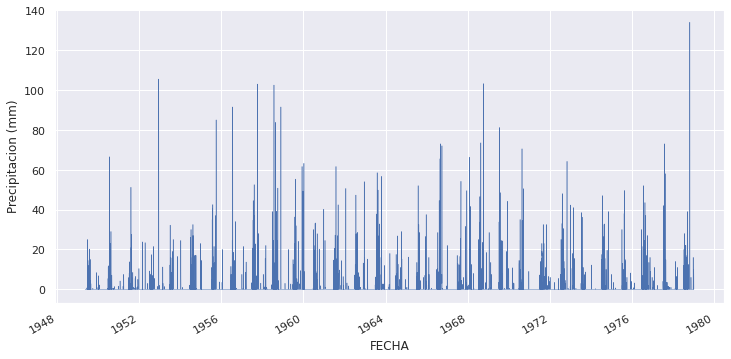

In [ ]:


sns.set(rc={'figure.figsize':(12,6)})

Precip_prom_30=df_datclim_ts30.PRECIP.mean()
Precip_prom_60=df_datclim_ts60.PRECIP.mean()
Precip_prom_90=df_datclim_ts90.PRECIP.mean()

PlotPrec30=df_datclim_ts30['PRECIP'].plot(linewidth=0.5)
PlotPrec30.set(ylabel='Precipitacion (mm)')


print('Variacion en precipitacion promedio 60-30:', Precip_prom_60-Precip_prom_30)
print('Variacion en precipitacion promedio 90-60:', Precip_prom_90-Precip_prom_60)


$\text{Graficas de precipitacion localizadas especificamente}$

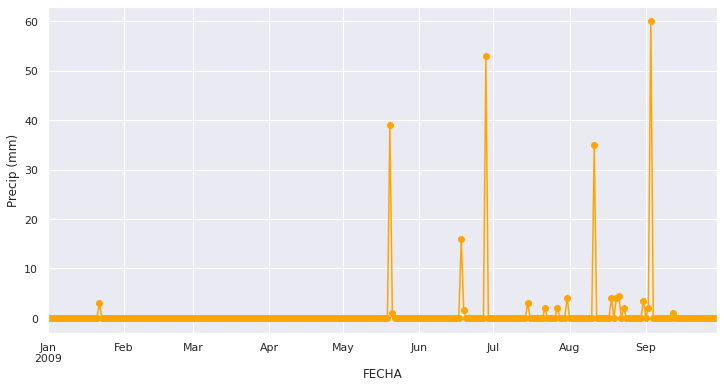

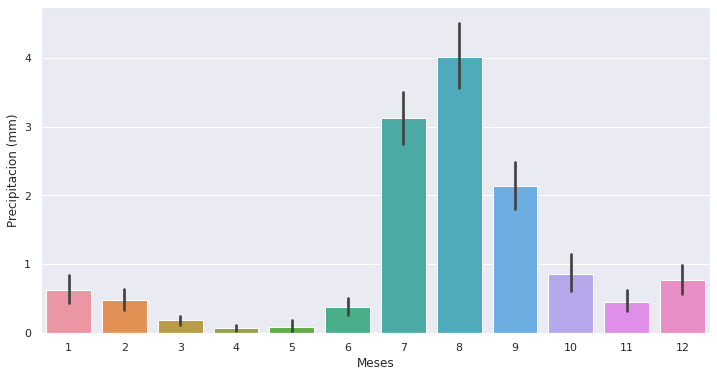

In [ ]:

sns.set_style=('whitegrid')

#Precipitacion en el 2009
df_loc2009=df_datclim_ts.loc['2009','PRECIP'].plot(marker='o',linestyle='-',color='orange')
df_loc2009.set_ylabel('Precip (mm)')
plt.show()

#Grafica de barras de la estacionalidad de la Precipitacion por meses
df_MesesBar=sns.barplot(x='Mes',y='PRECIP',data=df_datclim_ts)
df_MesesBar.set(xlabel='Meses',ylabel='Precipitacion (mm)')
plt.show()



# $\underline{\text{Parte 2:}}$

$\text{Explora tus datos de Temperaturas Máxima y Mínima de los últimos 30 años datos a partir de 1990.  Trata de construir dos subgráficas contiguas.}$

$\text{Ejercicio 1:}$

$\text{Grafica todo el rango de datos utilizando la función df.plot(), incluye una línea punteada mostrando el promedio. }$

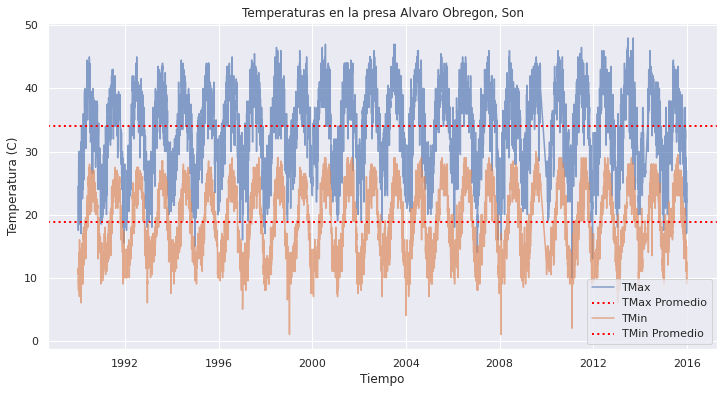

In [ ]:
sns.set_style=('whitegrid')
sns.set(rc={'figure.figsize':(12,6)})

#Graficando
colors=['red','blue']
cols_plotTemp=['TMax','TMin']

#Generando las subplots
fig, ax=plt.subplots()
for nm in cols_plotTemp:#Loop de las variables
  ax.plot(df_datclim_tsNov[nm],linestyle='-',alpha=0.65,label=nm)
  for color in colors:#Loop de los promedios
    plt.axhline(df_datclim_tsNov[nm].mean(),color=color,linestyle='dotted',linewidth=2,label=nm + ' ' + 'Promedio')
    break
#Detalles
ax.legend()
ax.set_ylabel('Temperatura (C)')
ax.set_xlabel('Tiempo')
ax.set_title('Temperaturas en la presa Alvaro Obregon, Son')

plt.show()



$\text{Ejercicio 2:}$

$\text{Ahora analizaremos un ano en especifico para las variables de Temperatura Maxima y Temperatura Minima, usando la funcion}$ $\underline{\text{.loc()}}$

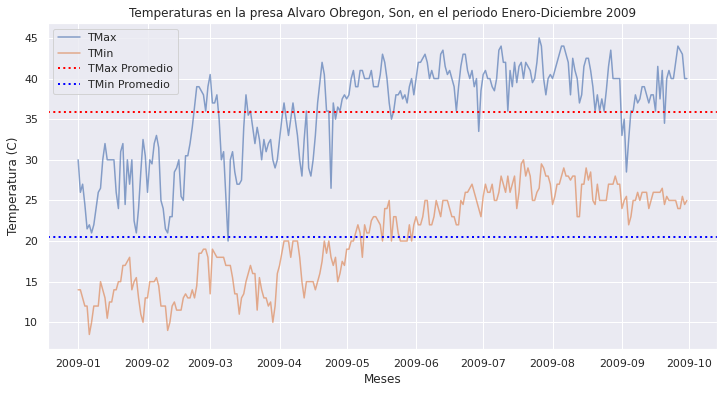

In [ ]:
#Detalles
sns.set_style=('whitegrid')
sns.set(rc={'figure.figsize':(12,6)})

#Primero creamos el data frame del tiempo que queremos analizar:
df_datclim_ts2009=df_datclim_ts.loc['2009-01-01':'2009-12-31']#[(df_datclim_ts['Año'] >= 2009) & (df_datclim_ts['Año'] < 2010)]

fig, ax=plt.subplots(sharex=True)
for nm in cols_plotTemp:
  ax.plot(df_datclim_ts2009[nm],linestyle='-',alpha=0.65,label=nm)

#Promedios de TMax y TMin:
plt.axhline(df_datclim_ts2009['TMax'].mean(),color='red',linestyle='dotted',linewidth=2,label='TMax' + ' ' + 'Promedio')
plt.axhline(df_datclim_ts2009['TMin'].mean(),color='blue',linestyle='dotted',linewidth=2,label='TMin' + ' ' + 'Promedio')


#Detalles
ax.legend()
ax.set_ylabel('Temperatura (C)')
ax.set_xlabel('Meses')
ax.set_title('Temperaturas en la presa Alvaro Obregon, Son, en el periodo Enero-Diciembre 2009')


plt.show()

$\text{Ejercicio 3:}$

$\text{Ahora vamos a graficar las mismas variables pero con una grafica de barras.}$

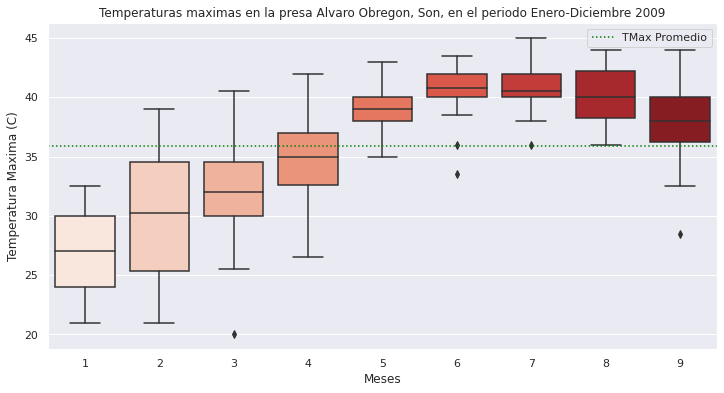

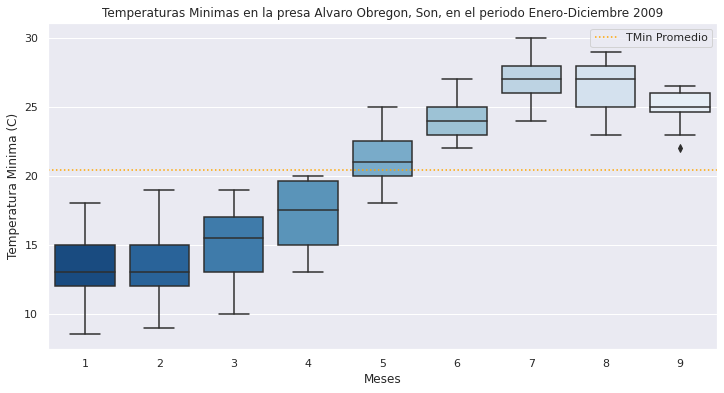

In [ ]:
#Detalles
sns.set_style=('whitegrid')
#sns.set(rc={'figure.figsize':(12,6)})

BarpTMax2009=sns.boxplot(y=df_datclim_ts2009['TMax'],x=df_datclim_ts2009['Mes'],palette='Reds')

#Detalles
plt.ylabel('Temperatura Maxima (C)')
plt.xlabel('Meses')
plt.title('Temperaturas maximas en la presa Alvaro Obregon, Son, en el periodo Enero-Diciembre 2009')
plt.axhline(y=df_datclim_ts2009['TMax'].mean(),linestyle='dotted',color='green',label='TMax'+' '+'Promedio')
plt.legend()
plt.show()



BarpTMin2009=sns.boxplot(y=df_datclim_ts2009['TMin'],x=df_datclim_ts2009['Mes'],palette='Blues_r')
plt.axhline(y=df_datclim_ts2009['TMin'].mean(),linestyle='dotted',color='orange',label='TMin'+' '+'Promedio')

#Detalles
plt.legend()
plt.ylabel('Temperatura Minima (C)')
plt.xlabel('Meses')
plt.title('Temperaturas Minimas en la presa Alvaro Obregon, Son, en el periodo Enero-Diciembre 2009')


plt.show()

# $\underline{\text{Parte 3:}}$

$\text{Ahora haremos el mismo analisis que en la Parte 2 pero con la variable de Evaporacion.}$

$\text{Ejercicio 1:}$

$\text{Grafica todo el rango de datos utilizando la función df.plot(), incluye una línea punteada mostrando el promedio. }$

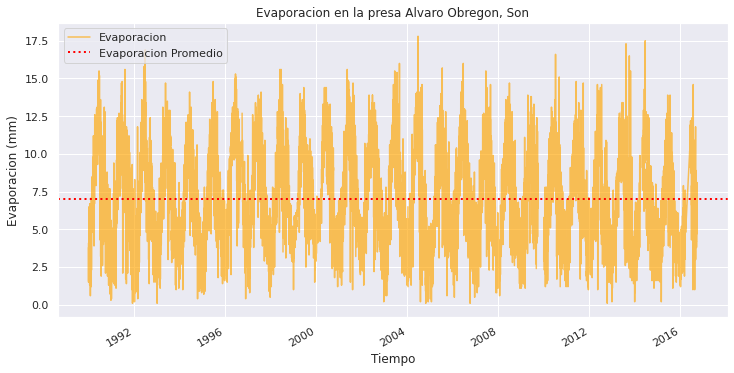

In [ ]:
#Detalles
sns.set_style=('whitegrid')
sns.set(rc={'figure.figsize':(12,6)})


#Graficando
#colors=['red','blue']
#cols_plotTemp=['TMax','TMin']

#Generando las subplots
#fig, ax=plt.subplots()
#for nm in cols_plotTemp:#Loop de las variables
df_datclimNovEVAP=df_datclim_ts.loc['1990':'2016','EVAP'].plot(marker=None,linestyle='-',color='orange',alpha=0.65,label='Evaporacion')
plt.axhline(df_datclim_tsNov['EVAP'].mean(),color=color,linestyle='dotted',linewidth=2,label='Evaporacion' + ' ' + 'Promedio')

#Detalles
plt.legend()
plt.ylabel('Evaporacion (mm)')
plt.xlabel('Tiempo')
plt.title('Evaporacion en la presa Alvaro Obregon, Son')

plt.show()




$\text{Ejercicio 2:}$

$\text{Analiza un año específico completo para las dos Temperaturas, con apoyo de la función df.loc()}$ 

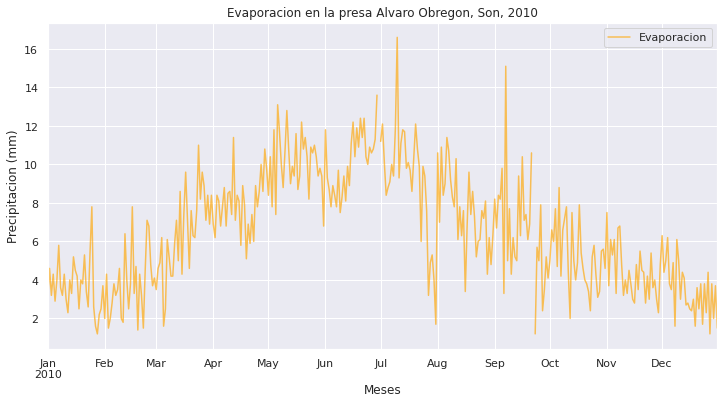

In [ ]:
#Detalles

sns.set_style=('whitegrid')
sns.set(rc={'figure.figsize':(12,6)})

df_datclim_ts2010=df_datclim_ts.loc['2010-01-01':'2010-12-31']
df_datclim_ts2010['EVAP'].plot(marker=None,linestyle='-',color='orange',alpha=0.65,label='Evaporacion')

plt.legend()
plt.title('Evaporacion en la presa Alvaro Obregon, Son, 2010')
plt.xlabel('Meses')
plt.ylabel('Precipitacion (mm)')

plt.show()


$\text{Ejercicio 3:}$

$\text{Ahora vamos a analizar la estacionalidad de la variable EVAP a lo largo de todos los datos.}$

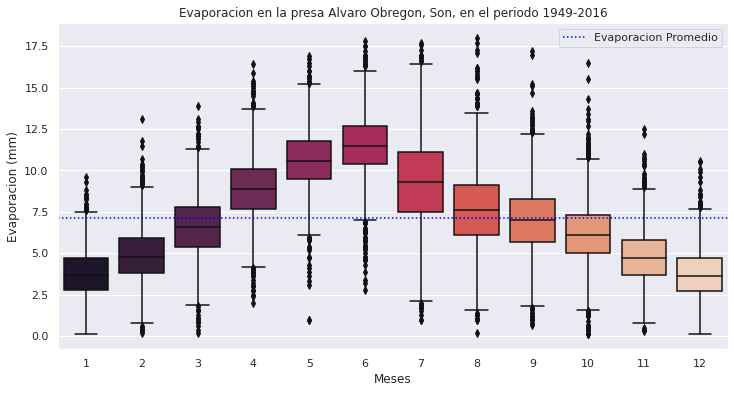

In [ ]:
#Detalles
sns.set_style=('whitegrid')
#sns.set(rc={'figure.figsize':(12,6)})

BoxpEVAP=sns.boxplot(y=df_datclim_ts['EVAP'],x=df_datclim_ts['Mes'],palette='rocket')

#Detalles
plt.ylabel('Evaporacion (mm)')
plt.xlabel('Meses')
plt.title('Evaporacion en la presa Alvaro Obregon, Son, en el periodo 1949-2016')
plt.axhline(y=df_datclim_ts2009['EVAP'].mean(),linestyle='dotted',color='blue',label='Evaporacion'+' '+'Promedio')
plt.legend()
plt.show()

# $\underline{\text{Parte 4:}}$

$\text{Ejercicio 1:}$



In [ ]:
#Haremos los df de los promedios movibles:
df_datclim_tsNov=df_datclim_ts[(df_datclim_ts['Año'] >= 1990) & (df_datclim_ts['Año'] < 2016)]

df_datclim_ts2010_7=df_datclim_ts2010.rolling(7, center=True).mean()
df_datclim_ts2010_30=df_datclim_ts2010.rolling(30, center=True).mean()
df_datclim_ts1990_365=df_datclim_tsNov.rolling(365, center=True).mean()

lst_prom_mov=['df_datclim_ts1990_7','df_datclim_ts1990_30','df_datclim_ts1990_365']

#Ahora los graficaremos en contraste con sus df originales

  

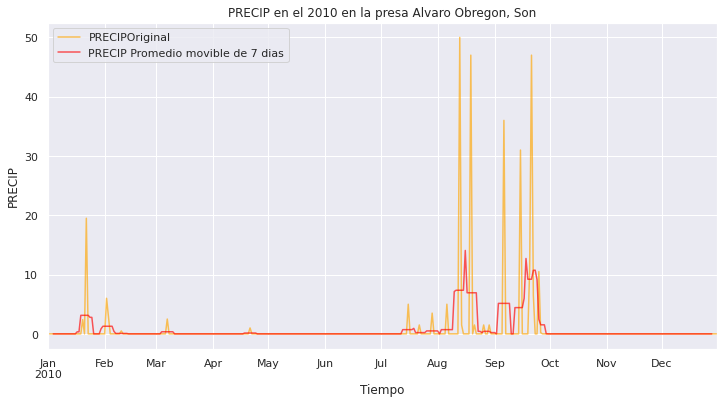

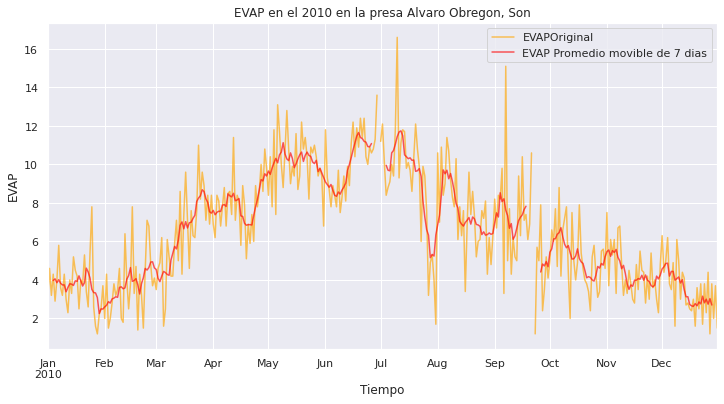

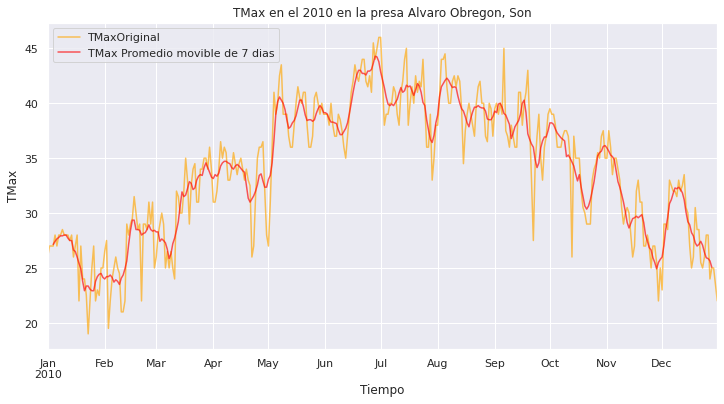

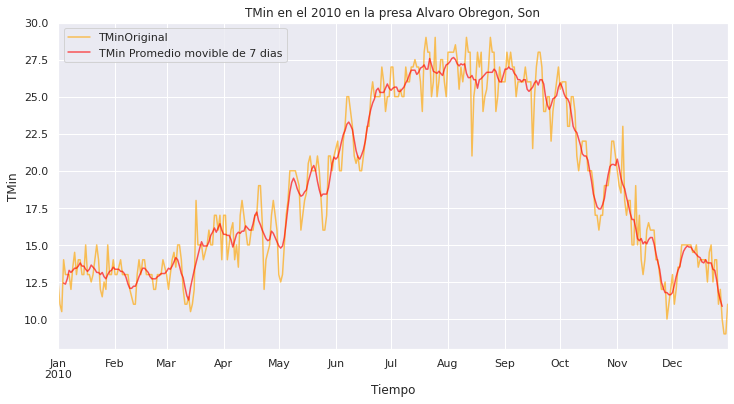

In [ ]:
#df con prom de 7 dias:
sns.set_style=('whitegrid')

for nm in cols_plot:
  df_datclim_ts2010[nm].plot(marker=None,linestyle='-',color='orange',alpha=0.65,label=nm + 'Original')
  for pm in cols_plot:
    if (pm!=nm):
      exit()
    else:
      df_datclim_ts2010_7[pm].plot(marker=None,linestyle='-',color='red',alpha=0.65,label=pm + ' ' + 'Promedio movible de 7 dias')
      plt.xlabel('Tiempo')
      plt.ylabel(nm)
      plt.legend()
      plt.title(nm + ' ' + 'en el 2010 en la presa Alvaro Obregon, Son')
      plt.show()


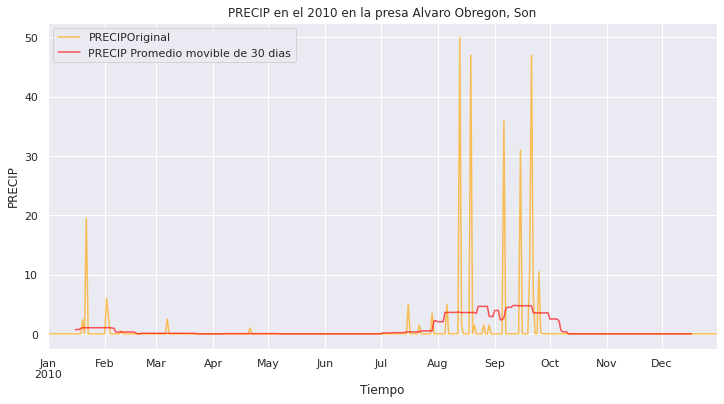

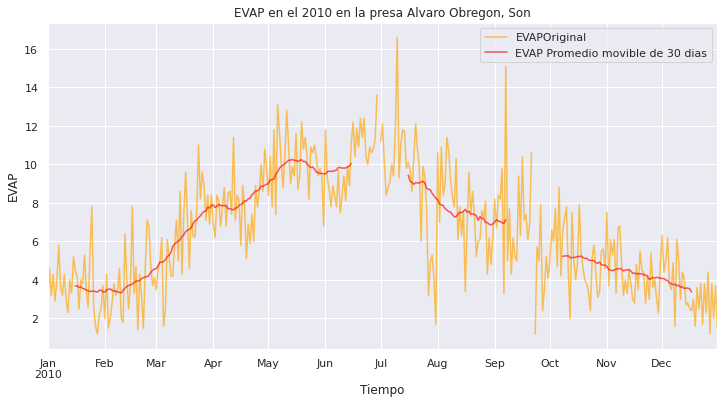

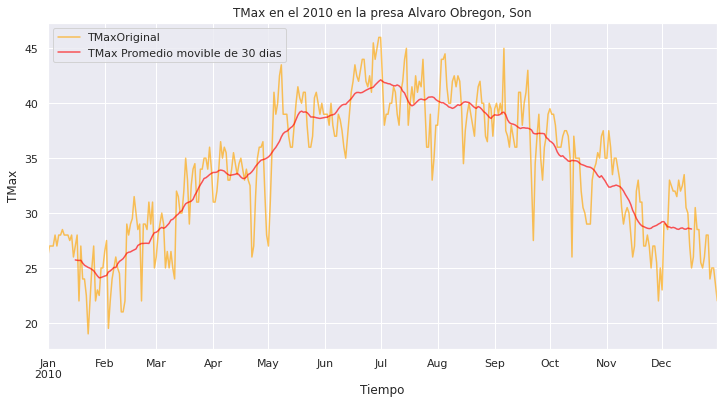

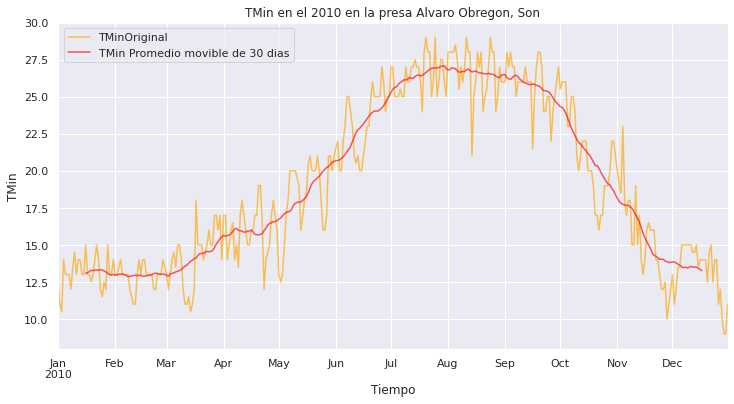

In [ ]:
#df con prom de 30 dias:
sns.set_style=('whitegrid')

for nm in cols_plot:
  df_datclim_ts2010[nm].plot(marker=None,linestyle='-',color='orange',alpha=0.65,label=nm + 'Original')
  for pm in cols_plot:
    if (pm!=nm):
      exit()
    else:
      df_datclim_ts2010_30[pm].plot(marker=None,linestyle='-',color='red',alpha=0.65,label=pm + ' ' + 'Promedio movible de 30 dias')
      plt.xlabel('Tiempo')
      plt.ylabel(nm)
      plt.legend()
      plt.title(nm + ' ' + 'en el 2010 en la presa Alvaro Obregon, Son')
      plt.show()

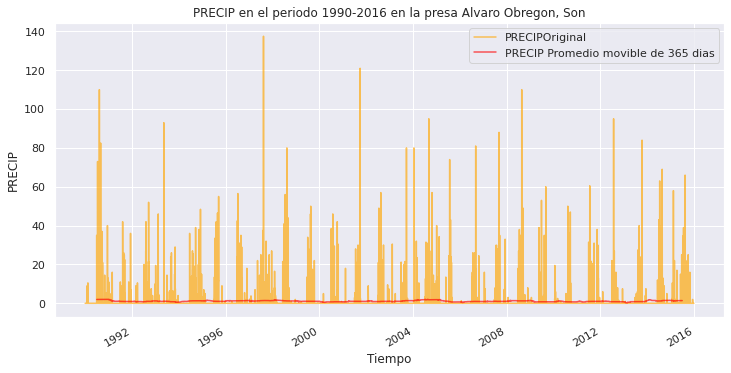

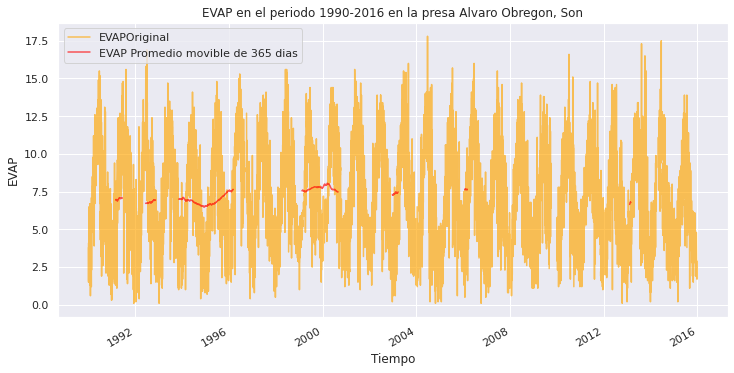

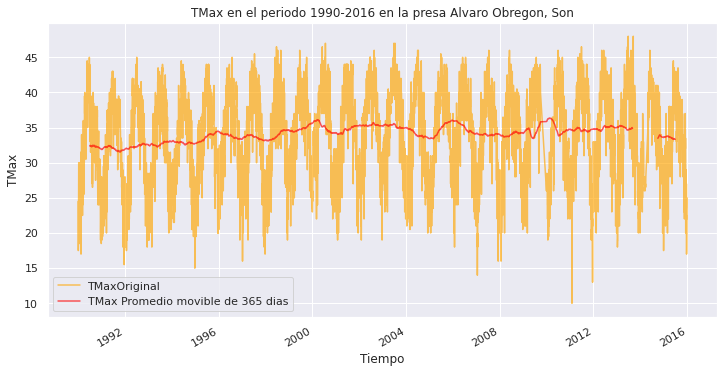

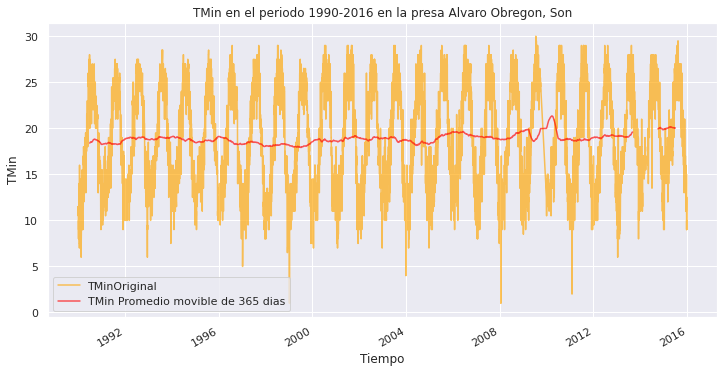

In [ ]:
#df con prom de 365 dias:
sns.set_style=('whitegrid')

for nm in cols_plot:
  df_datclim_tsNov[nm].plot(marker=None,linestyle='-',color='orange',alpha=0.65,label=nm + 'Original')
  for pm in cols_plot:
    if (pm!=nm):
      exit()
    else:
      df_datclim_ts1990_365[pm].plot(marker=None,linestyle='-',color='red',alpha=0.65,label=pm + ' ' + 'Promedio movible de 365 dias')
      plt.xlabel('Tiempo')
      plt.ylabel(nm)
      plt.legend()
      plt.title(nm + ' ' + 'en el periodo 1990-2016 en la presa Alvaro Obregon, Son')
      plt.show()

# $\underline{\text{Parte 5:}}$

$\text{Ahora analizaremos los datos usando la biblioteca de statsmodels.tsa y el comando seasonal_decompose}$

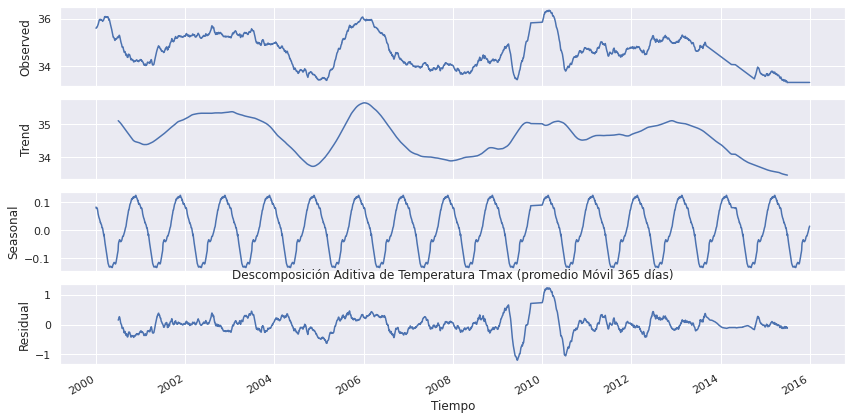

Text(0.5, 50.302245962155595, 'Tiempo')

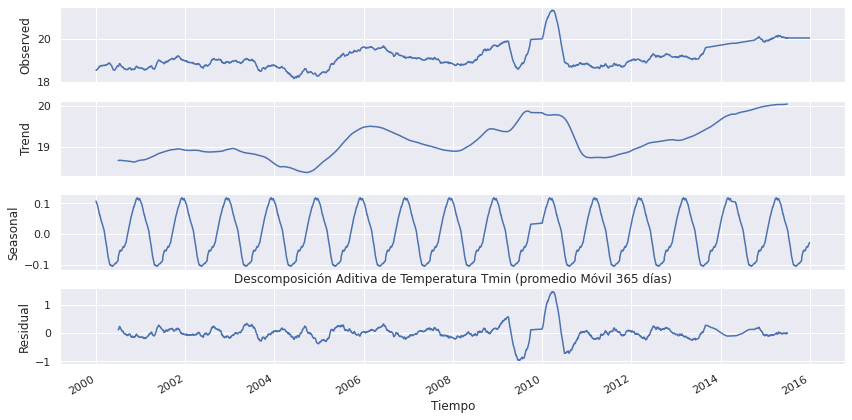

In [ ]:
import statsmodels.api as sm

#Detalles
sns.set_style=('whitegrid')
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos 
start, end = '2000-01', '2016-12'

# Vamos a darle una frecuencia de 365 dias
decompfreq = 365

# Graficando:
decompTmax = sm.tsa.seasonal_decompose(df_datclim_ts1990_365.loc[start:end, 'TMax'].interpolate(),
                                    freq=decompfreq, model='additive')
decompTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 365 días)');
plt.xlabel('Tiempo')
plt.show()
print('\n')

#Ahora graficaremos la de la temperatura minima:
sns.set_style=('whitegrid')
sns.set(rc={'figure.figsize':(12, 6)})
#periodo de datos completos:
start, end = '2000-01', '2016-12'

# Vamos a darle una frecuencia de 365 dias
decompfreq = 365

# Graficando:
decompTmin = sm.tsa.seasonal_decompose(df_datclim_ts1990_365.loc[start:end, 'TMin'].interpolate(),
                                    freq=decompfreq, model='additive')
decompTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 365 días)');
plt.xlabel('Tiempo')
#plt.ylabel('Temperatura (C)')

#Ahora vamos a graficar un tiempo para evaporacion entre 1980 y 2008 (Completos):
#Primero creamos el df del periodo:
#df_datclim_ts1980=df_datclim_ts.loc['1980-01':'2008-12']
#df_datclim_ts1980_365=df_datclim_ts1980.rolling(365, center=True).mean()


#sns.set_style=('whitegrid')
#sns.set(rc={'figure.figsize':(12, 6)})
#periodo de datos completos:
#start, end = '1980-01', '1980-02'

# Vamos a darle una frecuencia de 365 dias
#decompfreq = 365

# Graficando:
#decompTmin = sm.tsa.seasonal_decompose(df_datclim_ts1980_365.loc[start:end, 'TMin'].interpolate(),
#                                   freq=decompfreq, model='additive')
#decompTmin.plot()

#plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 365 días)');
#plt.xlabel('Tiempo')

# $\underline{\text{Parte 6:}}$

$\text{Ahora vamos a explorar los datos de temperaturas usando dos histogramas contiguos de 30 anos:}$

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


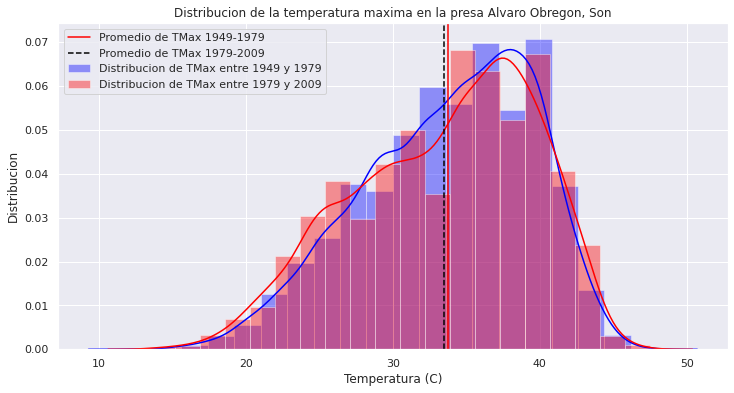

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


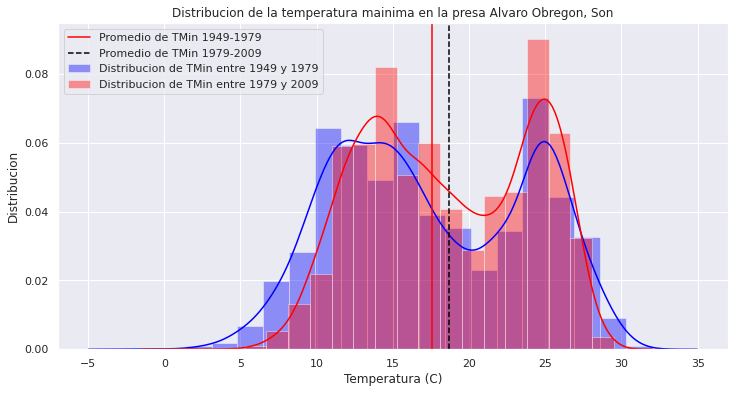

In [ ]:
#Detalles
sns.set_style=('whitegrid')
sns.set(rc={'figure.figsize':(12, 6)})

#Graficando 
TMaxdist_30=sns.distplot(df_datclim_ts30.TMax,bins=20,kde=True,color='blue',label='Distribucion de TMax entre 1949 y 1979')
plt.axvline(x=df_datclim_ts30.TMax.mean(),linestyle='-',color='red',label='Promedio de TMax 1949-1979')

TMaxdist_60=sns.distplot(df_datclim_ts60.TMax,bins=20,kde=True,color='red',label='Distribucion de TMax entre 1979 y 2009')
plt.axvline(x=df_datclim_ts60.TMax.mean(),linestyle='--',color='black',label='Promedio de TMax 1979-2009')

plt.legend()
plt.xlabel('Temperatura (C)')
plt.ylabel('Distribucion')
plt.title('Distribucion de la temperatura maxima en la presa Alvaro Obregon, Son')
plt.show()

#Ahora la distribucion de la temperatura minima
#Detalles
sns.set_style=('whitegrid')
sns.set(rc={'figure.figsize':(12, 6)})

#Graficando 
TMindist_30=sns.distplot(df_datclim_ts30.TMin,bins=20,kde=True,color='blue',label='Distribucion de TMin entre 1949 y 1979')
plt.axvline(x=df_datclim_ts30.TMin.mean(),linestyle='-',color='red',label='Promedio de TMin 1949-1979')

TMindist_60=sns.distplot(df_datclim_ts60.TMin,bins=20,kde=True,color='red',label='Distribucion de TMin entre 1979 y 2009')
plt.axvline(x=df_datclim_ts60.TMin.mean(),linestyle='--',color='black',label='Promedio de TMin 1979-2009')

plt.legend()
plt.xlabel('Temperatura (C)')
plt.ylabel('Distribucion')
plt.title('Distribucion de la temperatura mainima en la presa Alvaro Obregon, Son')
plt.show()